In [1]:
# importação das bibliotecas

import pandas as pd                                             # Analise e tratamento de dados
import numpy as np                                              # Tratamento de dados numéricos
import matplotlib                                               # Visualização de dados, importação para verficação da versão do matplotlib
import seaborn as sns                                           # Visualização de dados
import matplotlib.pyplot as plt                                 # Visualização de dados
from pylab import mpl, plt                                      # Visualização de dados, configuração de parametros de visualização
import plotly.express as px                                     # Visualização de dados
import plotly.graph_objects as go                               # Visualização de dados
from sklearn.linear_model import LogisticRegression             # Importação do modelo de regressão logística
from sklearn.model_selection import train_test_split            # Importação do modelo de divisão de conjuntos de treinamento e teste

In [2]:
# versões das bibliotecas
# importante analisar a versão das bibliotecas, pois algumas funcionalidades são das versões mais recentes

print(f'Versão Pandas :', pd.__version__)
print(f'Versão Numpy :', np.__version__)
print(f'Versão Matplotlib :', matplotlib.__version__)
print(f'Versão Seaborn :', sns.__version__)

Versão Pandas : 1.2.4
Versão Numpy : 1.19.5
Versão Matplotlib : 3.5.1
Versão Seaborn : 0.11.1


In [3]:
# leitura de dados direto do github e importação para uma variavel
cirrhosis_df = pd.read_csv('https://raw.githubusercontent.com/caiquemiranda/EDA-Exploratory-Data-Analysis/main/data/cirrhosis.csv')

In [4]:
# Visualização dos primeiros registros

cirrhosis_df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
# informações sobre o dataset

cirrhosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
# descrição estatística das variaveis numericas do dataset

cirrhosis_df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [7]:
# visualização dos valores nulos dos atribbutos em percentual

valores_nulos = round((cirrhosis_df.isnull().sum() / cirrhosis_df.shape[0]) * 100, 2) 
valores_nulos = pd.DataFrame({ "Values" : valores_nulos}).reset_index()
valores_nulos.sort_values(by = "Values", ascending = False)

,index,Values
16,Tryglicerides,32.54
11,Cholesterol,32.06
13,Copper,25.84
3,Drug,25.36
6,Ascites,25.36
7,Hepatomegaly,25.36
8,Spiders,25.36
15,SGOT,25.36
14,Alk_Phos,25.36
17,Platelets,2.63


In [8]:
# filtro com variaveis que contem o mesmo percentual de valores nulos e se existe correlação entre elas

filter_01 = ["Copper","Drug","Ascites","Hepatomegaly","Spiders","SGOT","Alk_Phos"]
cirrhosis_df[filter_01].corr()

,Copper,SGOT,Alk_Phos
Copper,1.000000,0.293829,0.187357
SGOT,0.293829,1.000000,0.112217
Alk_Phos,0.187357,0.112217,1.000000


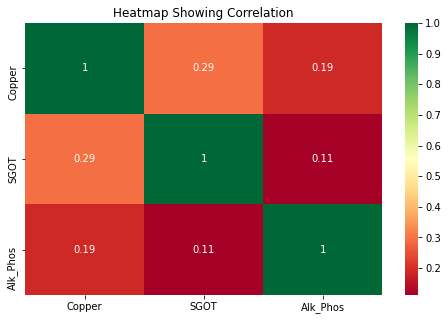

In [17]:
# visualização em heatmap das correlações entre as variaveis

plt.figure(figsize = (8,5))
sns.heatmap(cirrhosis_df[filter_01].corr(), annot = True, cmap = "RdYlGn");
plt.title("Heatmap Showing Correlation")
plt.show()

In [11]:
# filtro com variaveis que contem percentual de valores nulos proximos e se existe correlação entre elas

filter_02 = ["Tryglicerides","Cholesterol"]
cirrhosis_df[filter_02].corr()

,Tryglicerides,Cholesterol
Tryglicerides,1.00000,0.27683
Cholesterol,0.27683,1.00000


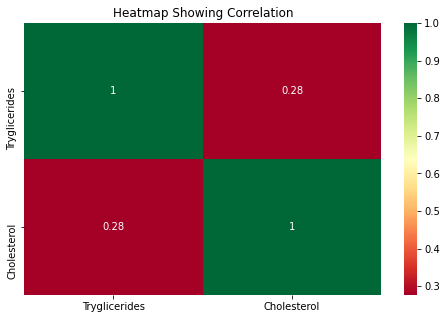

In [16]:
# visualização em heatmap das correlações entre as variaveis

plt.figure(figsize = (8,5))
sns.heatmap(cirrhosis_df[filter_02].corr(), annot = True, cmap = "RdYlGn");
plt.title("Heatmap Showing Correlation")
plt.show()

In [ ]:
# EDA em andamento